In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Exploracion tomando nrows columnas

In [2]:
df = pd.read_csv('searches.csv.bz2',sep="^",nrows=100000)

In [3]:
df.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [4]:
# Me quedo solo con las columnas necesarias para el problema

ex3 = df[['Date','Destination']]

In [5]:
cond1= ex3['Destination']=='AGP'
cond2= ex3['Destination']=='BCN'
cond3= ex3['Destination']=='MAD'
ex3=ex3[cond1 | cond2| cond3]
#AGP MAD BCN

In [6]:
ex3['Date']= pd.to_datetime(ex3['Date'])
ex3.head()

,Date,Destination
4,2013-01-01,MAD
93,2013-01-01,AGP
113,2013-01-01,BCN
147,2013-01-01,AGP
151,2013-01-01,MAD


In [7]:
ex3['year']= ex3['Date'].dt.year
ex3['month']= ex3['Date'].dt.month

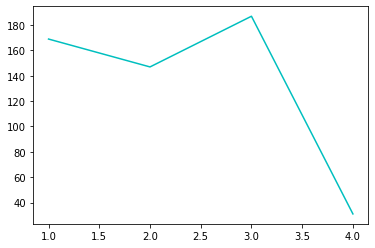

In [20]:
ex3_AGP= ex3[ex3['Destination']=='AGP'].groupby('month').count()
plt.plot(ex3_AGP.index,ex3_AGP['Destination'], color ='c')

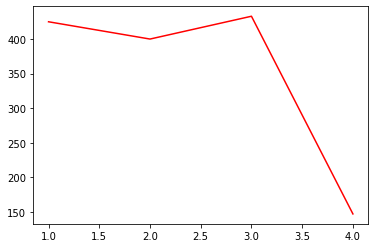

In [19]:
ex3_MAD= ex3[ex3['Destination']=='MAD'].groupby('month').count()
plt.plot(ex3_MAD.index,ex3_MAD['Destination'], color = 'r')

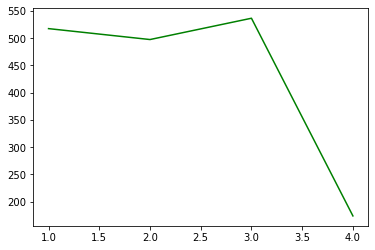

In [21]:
ex3_BCN= ex3[ex3['Destination']=='BCN'].groupby('month').count()
plt.plot(ex3_BCN.index,ex3_BCN['Destination'], color = 'g')

## Resolucion con Chunks para todo el dataframe con nrow =100000

Paso 1) bucle que filtre sólo las columnas Date y Destination para los destinos AGP MAD y BCN. 
Paso 2) Añado columnas de mes y año. 
Paso 3) Represento gráficamente


In [57]:
# Paso 1

df_chunk = pd.read_csv('searches.csv.bz2',sep="^",chunksize=10000, nrows=100000, usecols=('Date','Destination'))

chunk_list = []

for chunk in df_chunk:
    cond1= chunk['Destination']=='AGP'
    cond2= chunk['Destination']=='BCN'
    cond3= chunk['Destination']=='MAD'
    chunk = chunk[cond1|cond2|cond3]
    chunk_list.append(chunk)

df_total = pd.concat(chunk_list)

In [58]:
# paso 2
df_total['Date']= pd.to_datetime(df_total['Date'])

In [59]:
df_total['Date'].dt.year
df_total['month']= df_total['Date'].dt.month

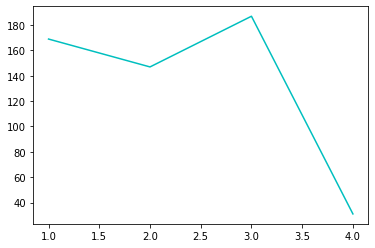

In [60]:
df_total_AGP= df_total[df_total['Destination']=='AGP'].groupby('month').count()
plt.plot(df_total_AGP.index,df_total_AGP['Destination'], color ='c')

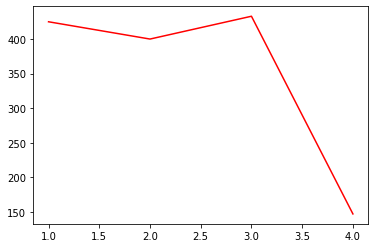

In [62]:
df_total_MAD= df_total[df_total['Destination']=='MAD'].groupby('month').count()
plt.plot(df_total_MAD.index,df_total_MAD['Destination'], color ='r')

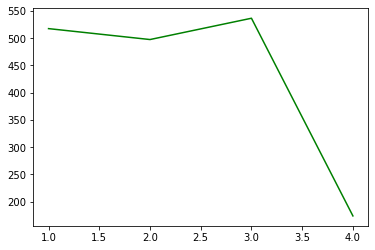

In [63]:
df_total_BCN= df_total[df_total['Destination']=='BCN'].groupby('month').count()
plt.plot(df_total_BCN.index,df_total_BCN['Destination'], color ='g')

## Solucion total

In [65]:
# Paso 1

df_chunk = pd.read_csv('searches.csv.bz2',sep="^",chunksize=100000, usecols=('Date','Destination'))

chunk_list = []

for chunk in df_chunk:
    cond1= chunk['Destination']=='AGP'
    cond2= chunk['Destination']=='BCN'
    cond3= chunk['Destination']=='MAD'
    chunk = chunk[cond1|cond2|cond3]
    chunk_list.append(chunk)

df_total = pd.concat(chunk_list)

In [68]:
# paso 2 - Sacar meses

df_total['Date']= pd.to_datetime(df_total['Date'])
df_total['month']= df_total['Date'].dt.month

In [72]:
df_total['year']=df_total['Date'].dt.year
df_total

,Date,Destination,month,year
4,2013-01-01,MAD,1,2013
93,2013-01-01,AGP,1,2013
113,2013-01-01,BCN,1,2013
147,2013-01-01,AGP,1,2013
151,2013-01-01,MAD,1,2013
...,...,...,...,...
20389978,2013-10-13,BCN,10,2013
20390045,2013-10-13,MAD,10,2013
20390073,2013-10-13,AGP,10,2013
20390160,2013-10-13,MAD,10,2013


In [80]:
# Agrupados

df_total_AGP= df_total[df_total['Destination']=='AGP'].groupby('month').count()
df_total_MAD= df_total[df_total['Destination']=='MAD'].groupby('month').count()
df_total_BCN= df_total[df_total['Destination']=='BCN'].groupby('month').count()

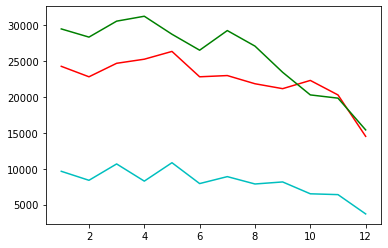

In [84]:
# Grafico

plt.plot(df_total_AGP.index,df_total_AGP['Destination'], color ='c');
plt.plot(df_total_MAD.index,df_total_MAD['Destination'], color ='r');
plt.plot(df_total_BCN.index,df_total_BCN['Destination'], color ='g');